# Using Machine Learning Tools: Workshop 2

**Chapter 1 – The Machine Learning landscape**

This is a modified version of the code accompanying Chapter 1 of 
_Hands-on Machine Learning with Scikit-Learn, Keras and TensorFlow, 2e_ by Aurelien Geron

--------------------------------------------------------------------

First check we have the required Python libraries.

Although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead.

In [2]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

In [3]:
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

In [4]:
# To plot pretty figures directly within Jupyter
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [5]:
# Code example
import numpy as np
import pandas as pd
import sklearn.linear_model

In [7]:
# Load the data using a pandas function
housing = pd.read_csv("workshop2.csv")

In [8]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


In [9]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  object 
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(4), object(2)
memory usage: 1.6+ MB


In [10]:
housing.describe()

,longitude,latitude,housing_median_age,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [11]:
housing.drop(columns=['ocean_proximity'],inplace=True)
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200


In [12]:
print(np.sum(housing.isna()))

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64


In [13]:
# The following is what I use (and I put it in the PythonCookbook)
# Notice the difference between the outputs of this and the previous one
np.sum(np.isnan(housing.apply(pd.to_numeric, errors="coerce")))

longitude                0
latitude                 0
housing_median_age       0
total_rooms           1018
total_bedrooms         207
population               0
households               0
median_income            0
median_house_value       0
dtype: int64

In [14]:
# Convert to numerical, then drop all problem rows (this is only one option for dealing with these)
housing = housing.apply(pd.to_numeric, errors="coerce")
housing.info()
print(np.sum(housing.isna()))
housing.dropna(inplace=True)  # Comment this out if you want to use imputation later on
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         19622 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
dtypes: float64(5), int64(4)
memory usage: 1.4 MB
longitude                0
latitude                 0
housing_median_age       0
total_rooms           1018
total_bedrooms         207
population               0
households               0
median_income            0
median_house_value       0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Inde

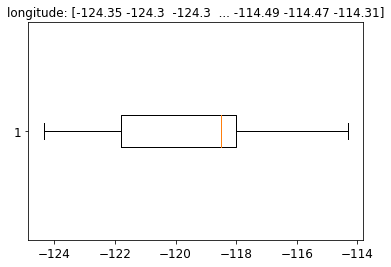

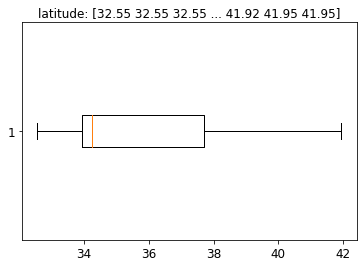

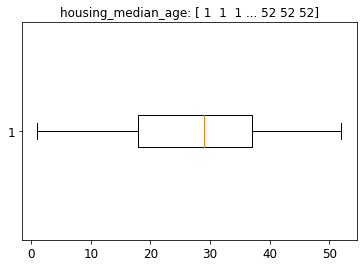

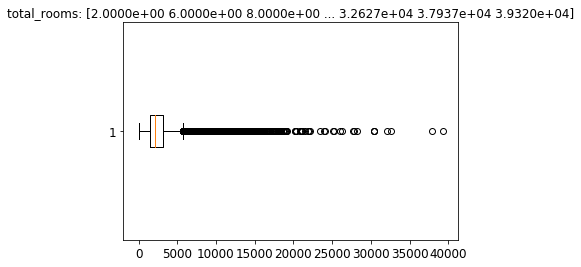

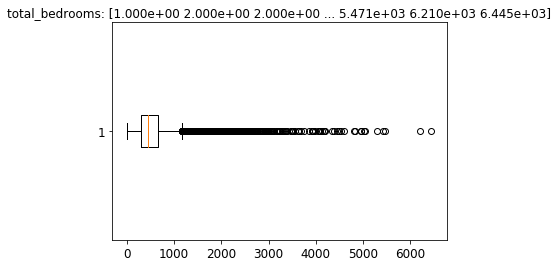

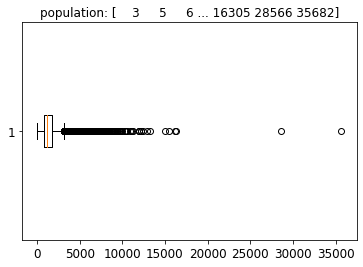

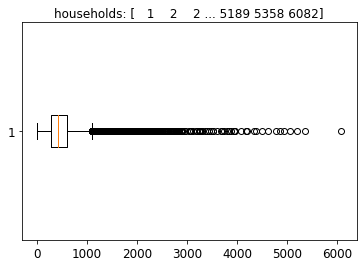

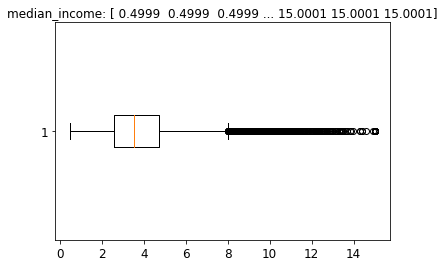

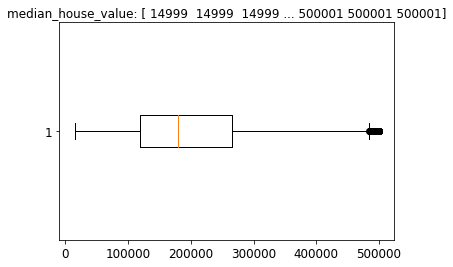

In [15]:
# Visualise using boxplots
for n in range(housing.shape[1]):
    plt.boxplot(housing.iloc[:,n],vert=False)
    plt.title(f'{housing.columns[n]}: {np.sort(housing.iloc[:,n])}')
    plt.show()

longitude: [-124.35 -124.3  -124.3  ... -114.49 -114.47 -114.31]


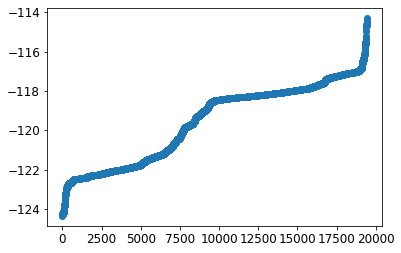

latitude: [32.55 32.55 32.55 ... 41.92 41.95 41.95]


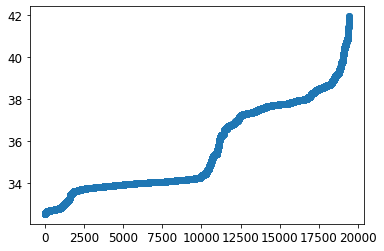

housing_median_age: [ 1  1  1 ... 52 52 52]


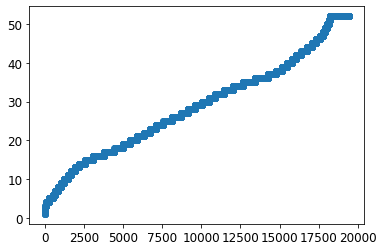

total_rooms: [2.0000e+00 6.0000e+00 8.0000e+00 ... 3.2627e+04 3.7937e+04 3.9320e+04]


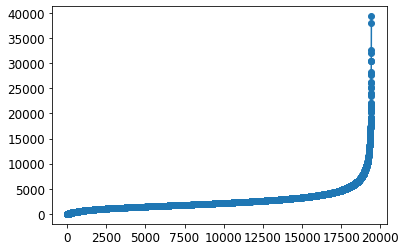

total_bedrooms: [1.000e+00 2.000e+00 2.000e+00 ... 5.471e+03 6.210e+03 6.445e+03]


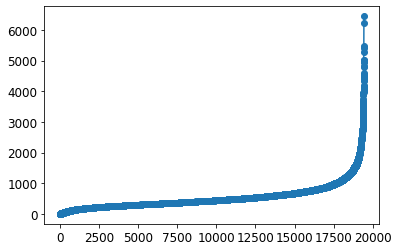

population: [    3     5     6 ... 16305 28566 35682]


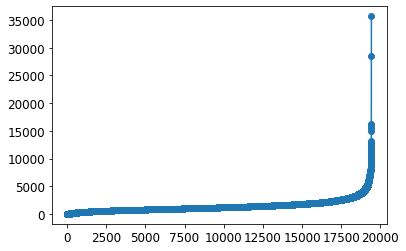

households: [   1    2    2 ... 5189 5358 6082]


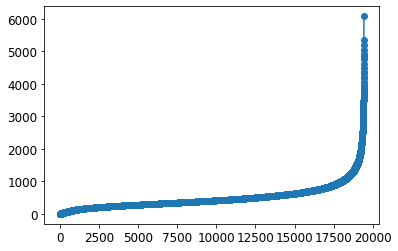

median_income: [ 0.4999  0.4999  0.4999 ... 15.0001 15.0001 15.0001]


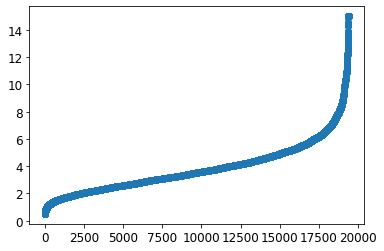

median_house_value: [ 14999  14999  14999 ... 500001 500001 500001]


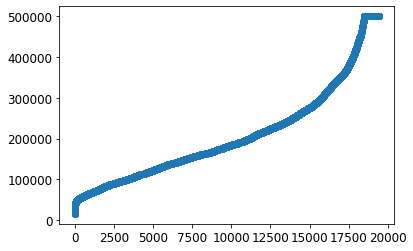

In [16]:
# Visualise using sorted values
for n in range(housing.shape[1]):
    print(f'{housing.columns[n]}: {np.sort(housing.iloc[:,n])}')
    plt.plot(np.sort(housing.iloc[:,n]),'-o')
    plt.show()

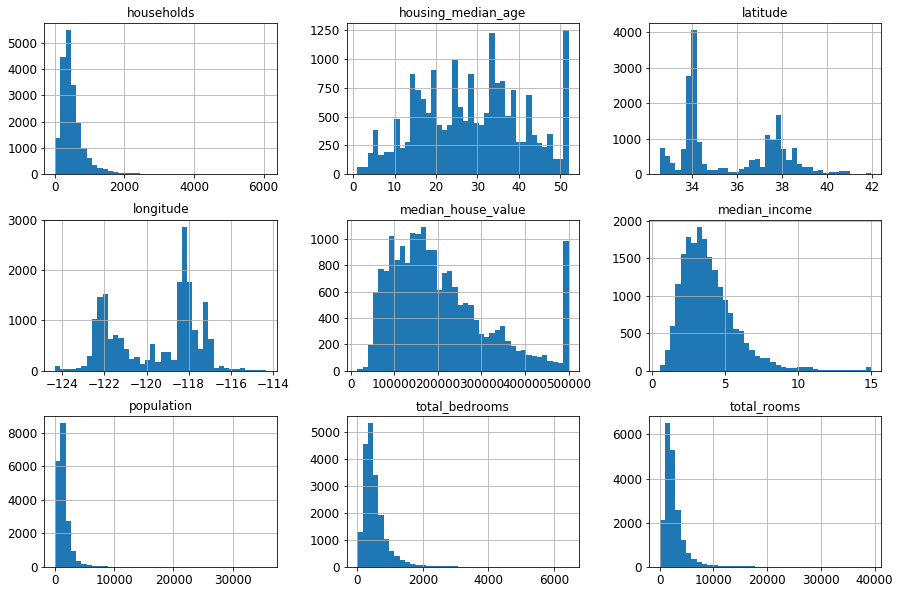

In [17]:
# Visualise using histograms
dummy = housing.hist(bins=40,figsize=(15,10))

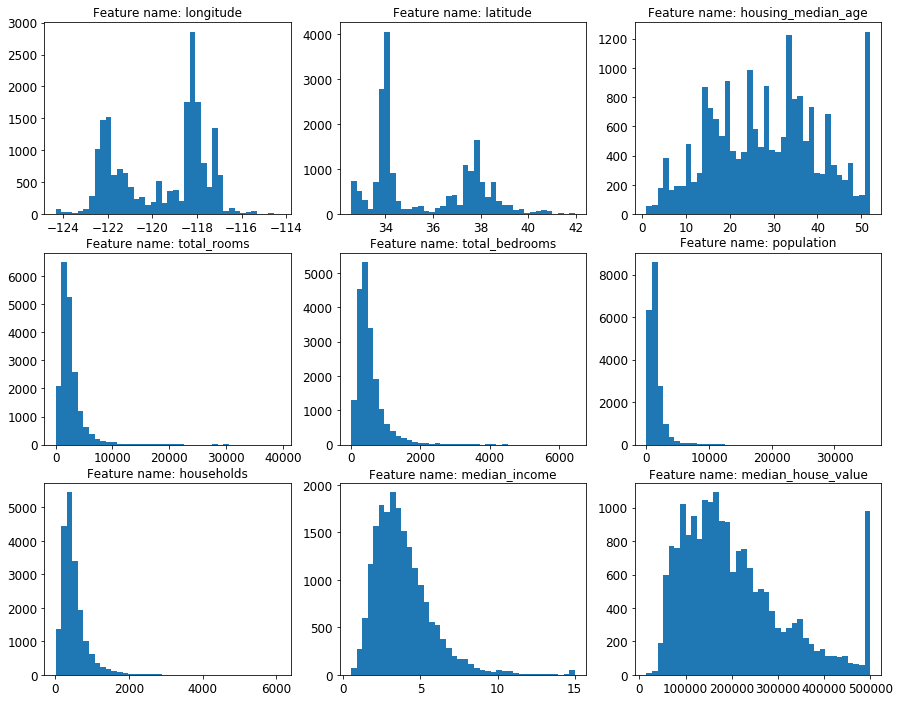

In [18]:
# Alternative using matplotlib
plt.figure(figsize=(15,12))
nfeat = housing.shape[1]
ncol = 3
nrow = int(np.ceil(nfeat/ncol))
for n in range(nfeat):
    plt.subplot(nrow,ncol,n+1)
    plt.hist(housing.iloc[:,n],bins=40)
    plt.title(f'Feature name: {housing.columns[n]}')
plt.show()

Now fix various problems with features, as identified from the above visualisations and descriptive tables

In [19]:
# Fix features ... chosen by examining the plots and descriptions above
# Unfinished parts in this cell and later are indicated with question marks
housing.iloc[?bad_vals?,?feature_number?] = np.nan
housing.describe()
# also use other ways to look at data again to confirm that what you've done has worked!

SyntaxError: invalid syntax (<ipython-input-19-aed04a9b9227>, line 3)

In [ ]:
# Take a copy of the dataframe
# Note that this is not a true *deep* copy, as not all lower level structures are copied
# See copy.deepcopy for a true deep copy (though we don't need this now)
housing_copy = housing.copy()

In [ ]:
# Estimate medians now that data is tidied up (though it would not change much)
medians = np.median(housing,axis=??)  # You need to decide on the right axis to use
print(medians)
housing.info()
print(housing.shape)

In [ ]:
# Perform imputation using median values (it is critical that this is done _after_ tidying data up)
for n in range(housing.shape[??]):
    housing.iloc[:,n] = housing.iloc[:,n].fillna(medians[n])
housing.describe()    

In [ ]:
# An alternative way to do imputation++
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
housing.info()
print(np.sum(np.isnan(housing),axis=0))
print(np.sum(np.isnan(housing.to_numpy()),axis=0))
housing_np = imputer.fit_transform(housing)
print(np.sum(np.isnan(housing_np),axis=0))

In [ ]:
import sklearn.model_selection

Ndata = housing.to_numpy()
X_all = Ndata[:,:???]
y_all = Ndata[:,???]
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X_all, y_all, test_size=0.2)

In [20]:
model = sklearn.linear_model.LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
plt.scatter(y_test,y_pred)
plt.plot(y_test,y_test,'k')

NameError: name 'X_train' is not defined

In [21]:
# Code to see how many good rows are left if a small amount of data corruption occurs with multiple features
ns = 400   # don’t use np for number of people, as it hides the np that stands for numpy!
nf = 100   # number of features
errate = 0.008   # error rate
vals = np.random.rand(ns,nf)   # uniform random numbers in [0,1]
errs = vals<errate  # Is True for specified error rate
nerrs = np.sum(errs,axis=1)   # number of errors per subject
print(np.sum(nerrs==0)/ns*100)   # percentage of subjects with complete records (no errors)

39.75
